In [4]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
from TextPreprocessing import clean

def cosine_similarity(documents):
    clean_documents = list(map(clean,documents))
    vectorizer = TfidfVectorizer(smooth_idf=True)
    X = vectorizer.fit_transform(clean_documents)
    X = X.toarray()
    return X, np.dot(X[0],X[1])
    
documents1 = ['''Machine learning (ML) is the study of computer algorithms that improve automatically through experience.[1] It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2][3]:2 Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.''',
             '''Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.'''
             ]

documents2 = ['''Machine learning (ML) is the study of computer algorithms that improve automatically through experience.[1] It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2][3]:2 Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.''',
             '''Machine learning (ML) is the study of computer algorithms that improve automatically through experience.[1] It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2][3]:2 Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, where it is difficult or infeasible to develop conventional algorithms to perform the needed tasks.

Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.[4][5] In its application across business problems, machine learning is also referred to as predictive analytics.'''
             ]
X1, sim1 = cosine_similarity(documents1)
X2, sim2 = cosine_similarity(documents2)

svd1 = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122).fit_transform(X1)
svd2 = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122).fit_transform(X2)

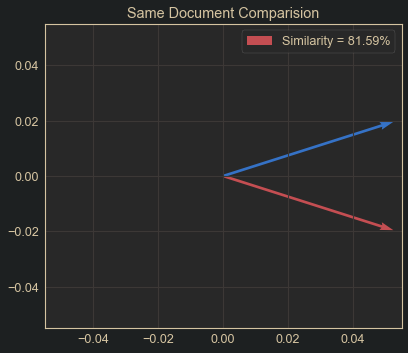

In [5]:
plt.quiver([0,0],[0,0], svd2[:,0], svd2[:,1],scale=2, color = ['r','b'],label = "Similarity = {}%".format(str(round(sim2*100,2))))
plt.legend()
plt.title("Same Document Comparision")
plt.savefig("Angle2.svg", dpi = 2000)
plt.show()

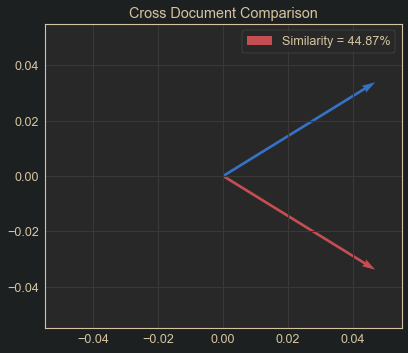

In [6]:
plt.quiver([0,0],[0,0], svd1[:,0], svd1[:,1],scale=2, color = ['r','b'],label = "Similarity = {}%".format(str(round(sim1*100,2))))
plt.legend()
plt.title("Cross Document Comparison")
plt.savefig("Angle1.svg", dpi = 2000)
plt.show()